<a href="https://colab.research.google.com/github/sjnaj/DeepLearning/blob/master/Basic/nn_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch
from d2l import torch as d2l
from torch import nn
from torchvision import transforms
import torchvision
from torch.utils import data


In [36]:
!pip install matplotlib==3.0#d2l包的matplotlib比较老

ERROR: Could not find a version that satisfies the requirement matplotlib==3.0#d2l包的matplotlib比较老 (from versions: 0.86, 0.86.1, 0.86.2, 0.91.0, 0.91.1, 1.0.1, 1.1.0, 1.1.1, 1.2.0, 1.2.1, 1.3.0, 1.3.1, 1.4.0, 1.4.1rc1, 1.4.1, 1.4.2, 1.4.3, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 2.0.0b1, 2.0.0b2, 2.0.0b3, 2.0.0b4, 2.0.0rc1, 2.0.0rc2, 2.0.0, 2.0.1, 2.0.2, 2.1.0rc1, 2.1.0, 2.1.1, 2.1.2, 2.2.0rc1, 2.2.0, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 3.0.0rc2, 3.0.0, 3.0.1, 3.0.2, 3.0.3, 3.1.0rc1, 3.1.0rc2, 3.1.0, 3.1.1, 3.1.2, 3.1.3, 3.2.0rc1, 3.2.0rc3, 3.2.0, 3.2.1, 3.2.2, 3.3.0rc1, 3.3.0, 3.3.1, 3.3.2, 3.3.3, 3.3.4, 3.4.0rc1, 3.4.0rc2, 3.4.0rc3, 3.4.0, 3.4.1, 3.4.2, 3.4.3, 3.5.0b1, 3.5.0rc1, 3.5.0, 3.5.1, 3.5.2)
ERROR: No matching distribution found for matplotlib==3.0#d2l包的matplotlib比较老


In [37]:
def load_data_fashion_mnist(batch_size, resize=None):
    """Download the Fashion-MNIST dataset and then load it into memory.

    Defined in :numref:`sec_fashion_mnist`"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=2),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=2))#collab限制最多两个


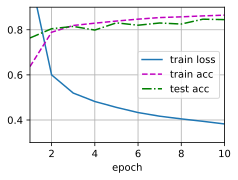

In [39]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256), nn.ReLU(), nn.Linear(256, 10))


def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)


net.apply(init_weights)

batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction="none")
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)


一个非常大的梯度流过一个 ReLU 神经元，更新过参数之后，这个神经元再也不会对任何数据有激活现象了。
如果这个情况发生了，那么这个神经元的梯度就永远都会是0.

实际操作中，如果你的learning rate 很大，那么很有可能你网络中的40%的神经元都”dead”了。
当然，如果你设置了一个合适的较小的learning rate，这个问题发生的情况其实也不会太频繁。

LeakyReLU(x)=max(0,x)+negative_slope∗min(0,x)

LeakyReLU即修正了数据分布，又保留了一些负轴的值，使得负轴信息不会全部丢失。
​

$LeakyRELU(x)=\begin{cases}
x; \text{ if } x \geq 0 \\
\text{negative\_slope} \times x; \text{ otherwise }
\end{cases}$

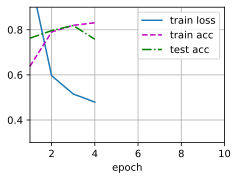

In [ ]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256), nn.LeakyReLU(0.01), nn.Linear(256, 10))


def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)


net.apply(init_weights)

batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction="none")
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
